#Đọc ảnh

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import os
import numpy as np


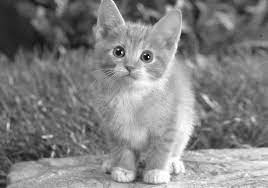

In [4]:
path_filename = ('/content/cat.jpg')
img = cv.imread(path_filename,0)
cv2_imshow(img)

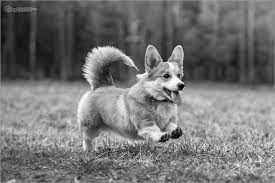

In [5]:
path_filename = ('/content/dog.jpg')
img1 = cv.imread(path_filename,0)
cv2_imshow(img1)

#Resize kích thước ảnh

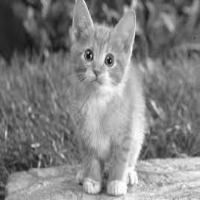

In [6]:
img_cat = cv.resize(img, (200, 200))
cv2_imshow(img_cat)

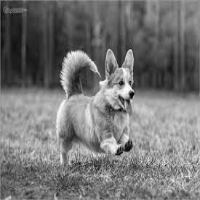

In [7]:
img_dog = cv.resize(img1, (200, 200))
cv2_imshow(img_dog)

#chuyển ảnh thành vecto

In [8]:
a = np.asarray(img, dtype=np.float32)
a

array([[ 46.,  46.,  47., ..., 131., 115., 106.],
       [ 45.,  46.,  46., ..., 139., 123., 113.],
       [ 44.,  45.,  45., ..., 141., 125., 116.],
       ...,
       [ 30.,  32.,  38., ..., 204., 196., 193.],
       [ 39.,  39.,  42., ..., 186., 176., 172.],
       [ 54.,  52.,  52., ..., 204., 192., 186.]], dtype=float32)

In [9]:
b = np.asarray(img1, dtype=np.float32)
b

array([[127.,  84.,  95., ..., 141., 141., 142.],
       [ 99.,  42.,  37., ..., 141., 141., 142.],
       [110.,  47.,  39., ..., 141., 141., 142.],
       ...,
       [114.,  80.,  85., ..., 133., 129., 124.],
       [124.,  85.,  87., ..., 153., 146., 138.],
       [151., 118., 119., ..., 156., 148., 141.]], dtype=float32)

#choose similarity

4 hàm, tính độ tương đồng trc, 1 hàm gọi 1 trong 4

In [10]:
from scipy.spatial import distance
import scipy.stats

In [11]:
from scipy import ndimage
import numpy as np
def sobel_filters(img):
  Sx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
  Sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)

  Ix = cv.filter2D(img, -1, Sx)
  Iy = cv.filter2D(img, -1, Sy)

  G=np.hypot(Ix,Iy)
  G=G/G.max()*255
  theta=np.arctan2(Iy,Ix)

  return Ix,Iy,G,theta

In [12]:
def calFeatureVector(img):
  img_ = cv.resize(img, (200, 200))
  _, _, G, _ = sobel_filters(img_)
  row_sum = np.sum(G, axis=1, dtype=np.float64)
  col_sum = np.sum(G, axis=0, dtype=np.float64)
  return (np.hstack((row_sum.T, col_sum)))

In [13]:
def absolute(img1, img2):
  abst = distance.euclidean(img1, img2)
  return abst

def cosine(img1, img2):
  cs = 1 - distance.cosine(img1, img2)
  return cs

def square(img1, img2):
  sq = np.square(img1, img2)
  return sq

def correlation(img1, img2):
  corr1 = scipy.stats.pearsonr(img1, img2) 
  corr2 = scipy.stats.spearmanr(img1, img2)
  corr3 = scipy.stats.kendalltau(img1, img2)
  return corr1, corr2, corr3
  

In [14]:
def choose(img1, img2, opt):
  if opt == 1:
    absolute(img1, img2)
  elif opt == 2:
    square(img1, img2)
  elif opt == 3:
    cosine(img1, img2)
  elif opt == 4:
    correlation(img1, img2)


In [15]:
img_rst_cat = calFeatureVector(img)
img_rst_dog = calFeatureVector(img1)

In [16]:
t = choose(img_rst_cat, img_rst_dog, 1)
t 